**Plotting Expected Transits by Multiplicity**

This code plots the expected number of transits by multiplicity (how many planets seen transiting) for the entire synthetic population of exoplanets, and then compares the results to Kepler's observed transits by mulitplicity. The plot draws from data in the `avg_prob_values_adjusted.csv` file.

In [3]:
from generate_lib import *
import pandas as pd

In [4]:
### GLOBAL FLAGS ###
# SHOW_PLOT: Whether to show the plots.
# SAVE_PLOT: Whether to save the generated plot as a separate file.
# PLOT_ALL: Whether to plot all available data (i.e. even from systems which did not integrate to 1 Myr).
# KEPLER_LABELS: Whether to displace the number of Kepler transits on the plot for each Kepler tick mark.
# VERBOSE: Whether to output the mean transit values from the synthetic data.
####################
SHOW_PLOT = True
SAVE_PLOT = False
PLOT_ALL = False
KEPLER_LABELS = False
VERBOSE = True

In [26]:
def get_col(head, header):
    '''This method gets the column index of a .csv file given a specified head and header list.
    
    Params:
    - Head: The specific head to use from the header.
    - Header: A list of heads.
    '''

    return header.index(head)

def plot_data():
    '''This method plots the data. No parameters required.'''

    filename = 'avg_prob_values'

    if PLOT_ALL:
        filename += '_all'

    filepath = os.path.join(os.pardir, os.pardir, 'data', 'processed', 'multiplicities', filename + '.csv')

    (header, data) = csv_2_data(filepath)

    aligned_data = list()
    random_data = list()
    multiplicities = list()
    xlabels = list()

    for head in header:
        if '(Aligned Omega)' in head:
            aligned_data.append(data[get_col(head, header)])
        elif '(Random Omega)' in head:
            n = head.split(' ')[0]

            multiplicities.append(int(n))
            xlabels.append(n + ' Planets')

            random_data.append(data[get_col(head, header)])

    # OG: 86760
    # To match 3-planet probs:
    NUM_PLANETS = 14288

    aligned_data = NUM_PLANETS * np.array(aligned_data).astype(float)
    random_data = NUM_PLANETS * np.array(random_data).astype(float)

    num_ticks = len(xlabels) + 2

    (fig, axes) = plt.subplots(2, 2, sharex = True, sharey = False)
    fig.set_size_inches(8.0, 8.0)

    xmin = multiplicities[0]

    assert xmin == np.min(multiplicities)

    xloc = np.arange(len(multiplicities)) + xmin

    plot_types = ['linear', 'log']

    # Number of observed transits by Kepler, from 1-planet transits to 6-planet transits.
    kepler_nums = [1171, 253, 100, 28, 6, 3]

    sysSim_nums = np.array([1905, 663, 229, 56, 22, 3, 1]) * (100.0 / 229)

    for plot_type in plot_types:
        offset = plot_types.index(plot_type) * 2
        
        plt.subplot(2, 2, 1 + offset)

        # Adds the labels.
        if plot_type == 'log':
            plt.plot([], [], color='red', label = 'Aligned $\Omega$')
            plt.plot([], [], color='blue', label = 'Random $\Omega$')
            plt.plot([], [], color=(0, 0, 0), label = 'Mean', linestyle = 'dashed')
            plt.plot([], [], color=(0.0, 0, 0), label = 'Present Day', linestyle = 'solid')
            plt.plot([], [], color = 'purple', label = 'Kepler', linestyle = '', marker = 'x')
            plt.plot([], [], color = 'green', label = 'SysSim', linestyle = '', marker = '+', markersize = 8)

        for idx in range(len(xloc)):
            if idx >= len(aligned_data):
                continue

            y = np.log10(aligned_data[idx]) if plot_type == 'log' else aligned_data[idx]              

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(y, xlow, xhigh, color = (1, 0, 0, 0.006))
            
            tnow = y[0]
            plt.hlines(tnow, xlow, xhigh, color = (0, 0, 0), linestyles = 'solid')

            avg = np.mean(y)
            plt.hlines(avg, xlow, xhigh, color = (0, 0, 0), linestyles = 'dashed')

        if plot_type == 'log':
            plt.plot(xloc[0:6], np.log10(kepler_nums), marker = 'x', color = 'purple', linestyle = '')
            plt.plot(xloc[0:7], np.log10(sysSim_nums), marker = '+', color = 'green', linestyle = '', markersize = 8)

            # Adds numbered labels to the Kepler datapoints, for log10.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx], np.log10(kepler_nums[idx]), s = '%.3f' % np.log10(kepler_nums[idx]), color = 'purple')
        else:
            plt.plot(xloc[0:6], kepler_nums, marker = 'x', color = 'purple', linestyle = '')
            plt.plot(xloc[0:7], sysSim_nums, marker = '+', color = 'green', linestyle = '', markersize = 8)

            #(x_min, x_max) = plt.xlim()

            #plt.hlines(0.0, x_min, x_max, color = 'black', linestyles = 'dashed', alpha = 0.3)

            # Adds numbered labels to the Kepler datapoints, for linear.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx] - 0.4, kepler_nums[idx] + 30, s = '%i' % kepler_nums[idx], color = 'purple')

        plt.subplot(2, 2, 2 + offset)

        for idx in range(len(xloc)):
            if idx >= len(random_data):
                continue

            ry = np.log10(random_data[idx]) if plot_type == 'log' else random_data[idx]

            xlow = (xmin + idx) - 0.5
            xhigh = (xmin + idx) + 0.5

            plt.hlines(ry, xlow, xhigh, color = (0, 0, 1, 0.006))

            tnow = ry[0]
            plt.hlines(tnow, xlow, xhigh, color = (0, 0, 0), linestyles = 'solid')
            
            avg = np.mean(ry)

            if VERBOSE:
                print('Random mean {n}-planets ({type}): '.format(n = idx + 1, type = plot_type) + str(avg))

            plt.hlines(avg, xlow, xhigh, color = (0, 0, 0), linestyles = 'dashed')

        if plot_type == 'log':
            plt.plot(xloc[0:6], np.log10(kepler_nums), marker = 'x', color = 'purple', linestyle = '')
            plt.plot(xloc[0:7], np.log10(sysSim_nums), marker = '+', color = 'green', linestyle = '', markersize = 8)

            # Adds numbered labels to the Kepler datapoints, for log10.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                        plt.text(xloc[idx], np.log10(kepler_nums[idx]), s = '%.3f' % np.log10(kepler_nums[idx]), color = 'purple')
        else:
            plt.plot(xloc[0:6], kepler_nums, marker = 'x', color = 'purple', linestyle = '')
            plt.plot(xloc[0:7], sysSim_nums, marker = '+', color = 'green', linestyle = '', markersize = 8)

            # Adds numbered labels to the Kepler datapoints, for linear.
            if KEPLER_LABELS:
                for idx in range(len(kepler_nums)):
                    plt.text(xloc[idx], kepler_nums[idx], s = '%i' % kepler_nums[idx], color = 'purple')

    for row in range(len(axes)):
        for col in range(len(axes[row])):
            ax = axes[row][col]
            ax.yaxis.set_major_locator(tck.LinearLocator(num_ticks + 2))
            ax.grid(True, axis = 'y', alpha = 0.5)

            if col == 0:
                ax.yaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: ('%.3f' % x) if pos != 0 and pos != num_ticks + 1 else ''))

                if row == 0:
                    ax.set_ylabel('Expected Transits')
                else:
                    ax.set_ylabel('$\log_{10}($Expected Transits$)$')
            else:
                ax.tick_params(axis='y', bottom = False, top = False, length = 0)
                
                ax.yaxis.set_major_formatter(tck.NullFormatter())

            ax.set_xticks(xloc, xlabels, rotation=45)

    fig.legend(bbox_to_anchor = (0.905, 0.885))
    plt.subplots_adjust(wspace = 0.0, hspace = 0.0)
    plt.suptitle('Average Expected Transits Over Time by Multiplicity ($N={n}$ stars)'.format(n = NUM_PLANETS), y = 0.92)

    if SHOW_PLOT:
        plt.show()

    if SAVE_PLOT:
        savename = 'avg_exp_transits_by_mult'

        if PLOT_ALL:
            savename += '_all'

        savepath = os.path.join(os.pardir, os.pardir, 'results', 'multiplicities', 'avg_prob_values', savename)
        fig.savefig(savepath, dpi = 300, bbox_inches = 'tight')

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_lim'

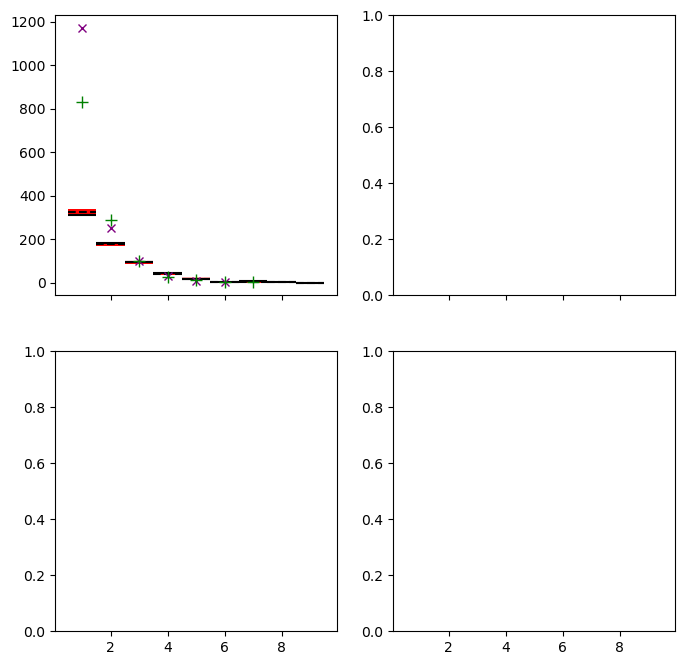

In [27]:
plot_data()

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f